## Sonar Dataset Regression Problem

import statements

In [1]:
#Author - Ashish Kumar Jayant
#Date - 28th March,2017
#Title - Sonar Dataset Problem



import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.metrics import mean_squared_error

Dataframes

In [2]:
sonar_reg = pd.read_csv("Ex07_Sonar_Regreesion.csv")

In [3]:
sonar_reg['pH'] = sonar_reg['pH'].fillna(sonar_reg['pH'].mean())
sonar_reg_y = sonar_reg['Distance']
sonar_reg_x  = sonar_reg.drop("Distance",axis = 1)


# Without Scaling

## Exploration of data : Features vs Target plot

Echo time vs distance

In [4]:
x = np.array(sonar_reg_x['EchoTime'])
print("Standard deviation")
print(x.std())

Standard deviation
1.68955827958


In [5]:
y = np.array(sonar_reg_y)

In [6]:
plt.scatter(x,y)

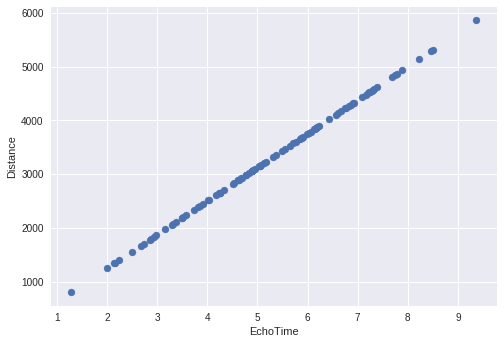

In [7]:
plt.ylabel("Distance")
plt.xlabel("EchoTime")
plt.show()

WaterTemp vs Distance

In [8]:
x = np.array(sonar_reg_x['WaterTemp'])
print("Standard deviation")
print(x.std())

Standard deviation
2.43333105023


In [9]:
y = np.array(sonar_reg_y)

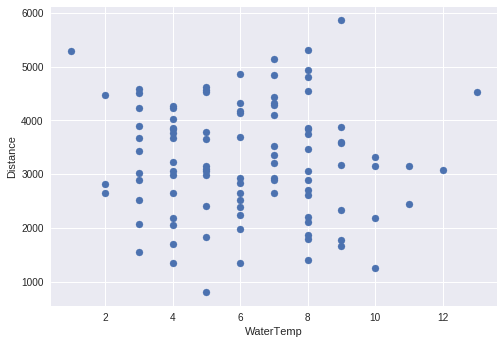

In [10]:
plt.ylabel("Distance")
plt.xlabel("WaterTemp")
plt.scatter(x,y)
plt.show()

Clconcentration vs Distance

In [11]:
x = np.array(sonar_reg_x['Clconcentration'])
print("Standard deviation")
print(x.std())

Standard deviation
0.0102772502944


In [12]:
y = np.array(sonar_reg_y)

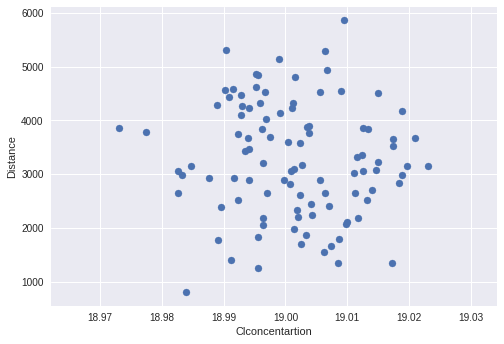

In [13]:
plt.ylabel("Distance")
plt.xlabel("Clconcentartion")
plt.scatter(x,y)
plt.show()

Salinity vs Distance

In [14]:
x = np.array(sonar_reg_x['Salinity'])
print("Standard deviation")
print(x.std())

Standard deviation
0.0185663665193


In [15]:
y = np.array(sonar_reg_y)

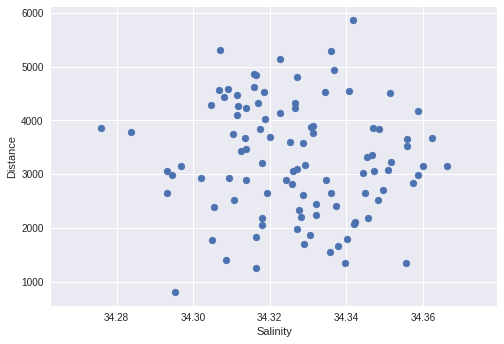

In [16]:
plt.ylabel("Distance")
plt.xlabel("Salinity")
plt.scatter(x,y)
plt.show()

pH vs Distance

In [17]:
x = np.array(sonar_reg_x['pH'])
print("Standard deviation")
print(x.std())

Standard deviation
0.0958725141489


In [18]:
y = np.array(sonar_reg_y)

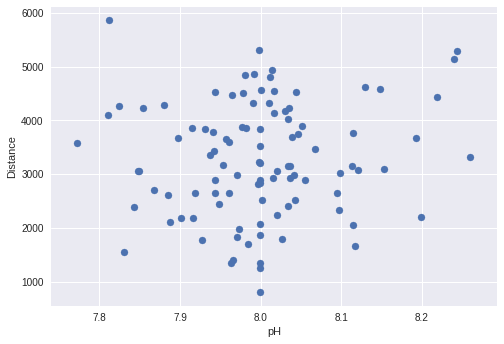

In [19]:
plt.ylabel("Distance")
plt.xlabel("pH")
plt.scatter(x,y)
plt.show()

## Correlation Matrix

In [20]:
corr = sonar_reg.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

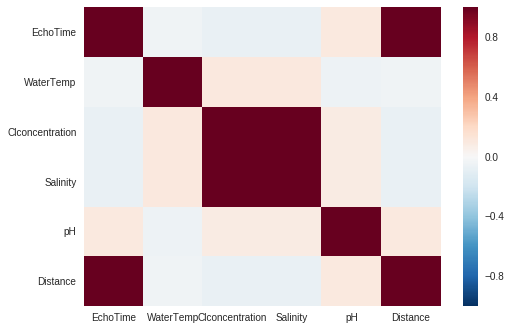

In [21]:
plt.show()

## Training Data : Testing Data split in 60:40 ratio

In [22]:
train_x = np.array(sonar_reg_x[:60])

In [23]:
train_y = np.array(sonar_reg_y[:60])

In [24]:
test_x = np.array(sonar_reg_x[61:99])
test_y = np.array(sonar_reg_y[61:99])

## Chosing the alpha for Lasso &  fitting in Linear Regression using Lasso Regularization

In [25]:
alphas1 = np.linspace(0.001,375.25,10000)*0.5

In [26]:
lasso1 = linear_model.Lasso(max_iter=10000, normalize=True)
coefs = []
for a in alphas1:
    lasso1.set_params(alpha=a)
    lasso1.fit(train_x,train_y)
    coefs.append(lasso1.coef_)
ax = plt.gca()
ax.plot(alphas1*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

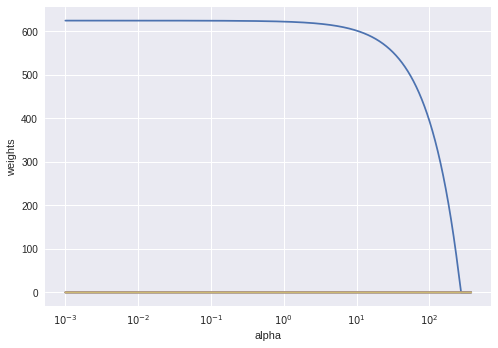

In [27]:
plt.show()

In [28]:
lassocv1 = linear_model.LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv1.fit(train_x,train_y)
lasso1.set_params(alpha=lassocv1.alpha_)
lasso1.fit(train_x,train_y)

Lasso(alpha=0.13568860820575726, copy_X=True, fit_intercept=True,
   max_iter=10000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [29]:
print(sonar_reg_x.columns)

# The coefficients
print('Coefficients: \n', lasso1.coef_)

Index(['EchoTime', 'WaterTemp', 'Clconcentration', 'Salinity', 'pH'], dtype='object')
Coefficients: 
 [ 624.37434328   -0.           -0.           -0.            0.        ]


In [30]:
predicted_distance = lasso1.predict(test_x)
                                                                        

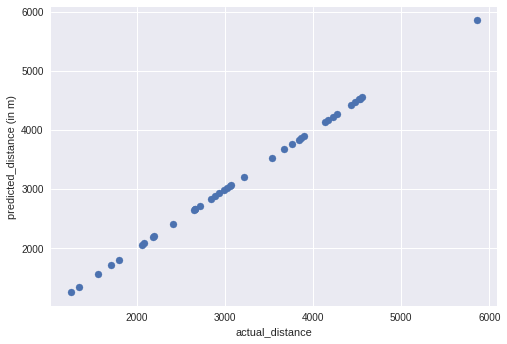

In [31]:
plt.scatter(test_y,predicted_distance)
plt.ylabel("predicted_distance (in m)")
plt.xlabel("actual_distance")
plt.show()

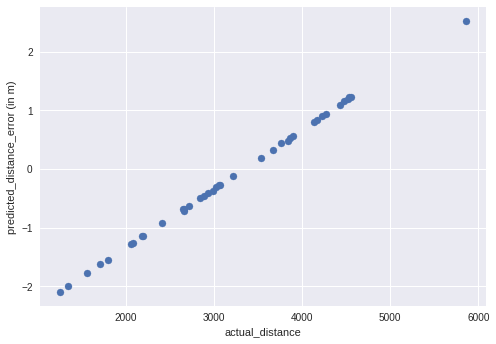

In [32]:
plt.scatter(test_y,test_y - predicted_distance)
plt.ylabel("predicted_distance_error (in m)")
plt.xlabel("actual_distance")
plt.show()


# With scaling by Z-scores

#### Exploration of data : scaled features plots

In [33]:
sonar_reg_std = (sonar_reg - sonar_reg.mean())/sonar_reg.std()

In [34]:
sonar_reg_std_x = sonar_reg_std.drop("Distance",axis = 1)

In [35]:
l = list(sonar_reg_std_x.columns)

In [36]:
y = sonar_reg_std['Distance']

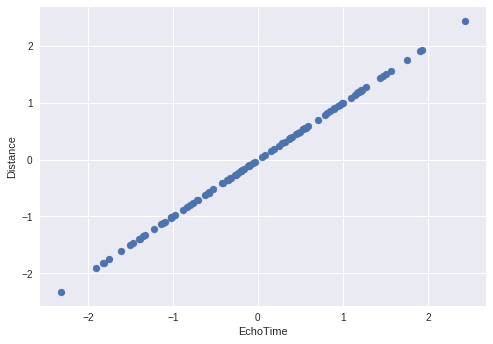

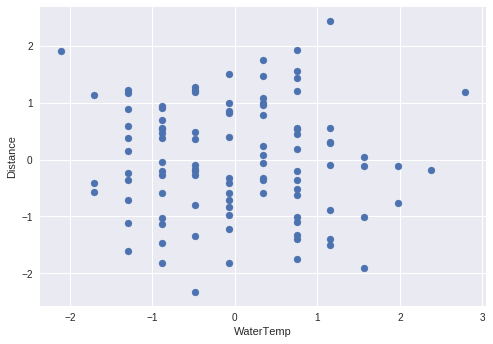

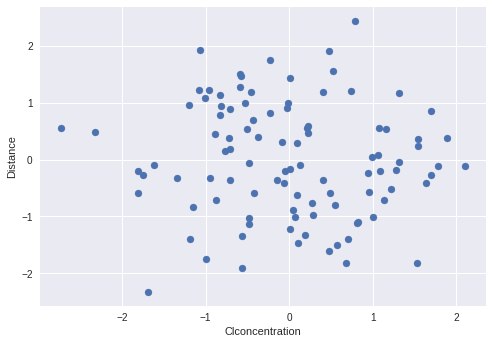

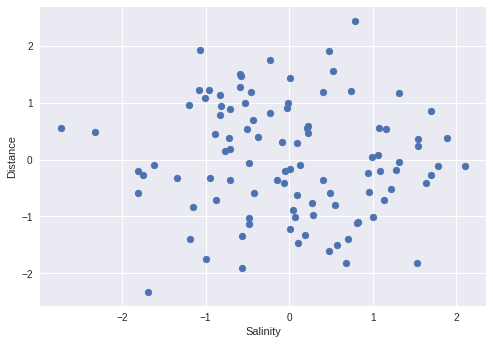

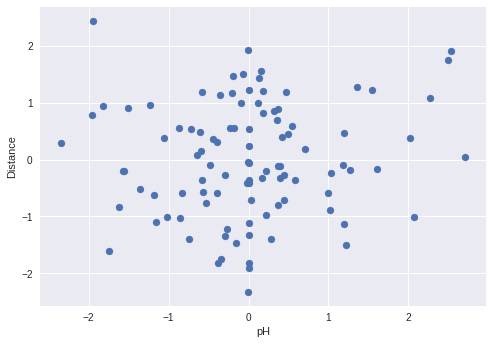

In [37]:
for i in range(len(l)):
    x = np.array(sonar_reg_std_x[l[i]])
    plt.scatter(x,y)
    plt.xlabel(l[i])
    plt.ylabel("Distance")
    plt.show()

### Box plots for features

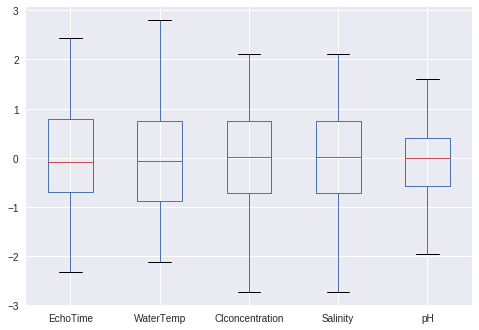

In [38]:
sonar_reg_std_x.plot(kind = 'box')
plt.show()

## Splitting the scaled data (training:testing =  60:40)

In [39]:
train_x_std = np.array(sonar_reg_std_x[:60])

In [40]:
train_y_std = np.array(sonar_reg_std['Distance'][:60])

In [41]:
test_x_std = np.array(sonar_reg_std_x[61:99])

In [42]:
test_y_std = np.array(sonar_reg_std['Distance'][61:99])

## Chosing the alpha for Lasso &  fitting in Linear Regression using Lasso Regularization

In [43]:
alphas = np.linspace(0.001,1.25,10000)*0.5

In [44]:
lasso = linear_model.Lasso(max_iter=10000, normalize=True)
coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(train_x_std,train_y_std)
    coefs.append(lasso.coef_)
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

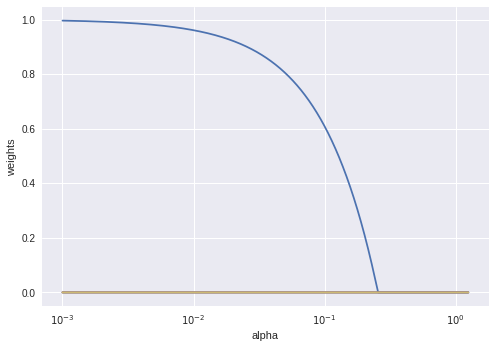

In [45]:
plt.show()

In [46]:
lassocv = linear_model.LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(train_x_std,train_y_std)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(train_x_std,train_y_std)
mean_squared_error(test_y_std, lasso.predict(test_x_std))

1.0166779377478679e-06

In [47]:
lasso.coef_

array([ 0.99899893, -0.        , -0.        , -0.        ,  0.        ])

In [48]:
predicted_distance_std = lasso.predict(test_x_std)

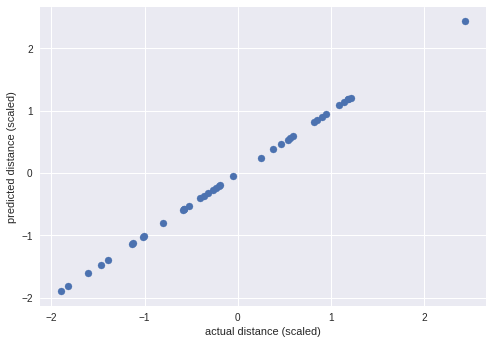

In [49]:
plt.scatter(test_y_std,predicted_distance_std)
plt.ylabel("predicted distance (scaled)")
plt.xlabel("actual distance (scaled)")
plt.plot()
plt.show()

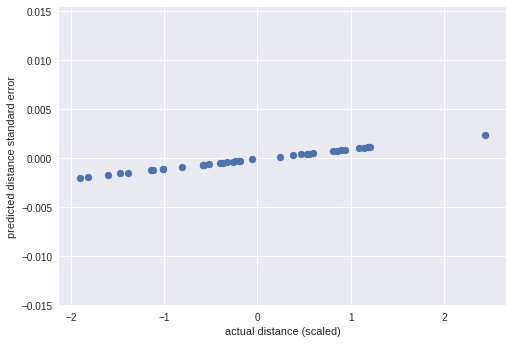

In [50]:
plt.scatter(test_y_std,test_y_std - predicted_distance_std)
plt.ylabel("predicted distance standard error")
plt.xlabel("actual distance (scaled)")
plt.plot()
plt.show()

## Rescaling to original distance

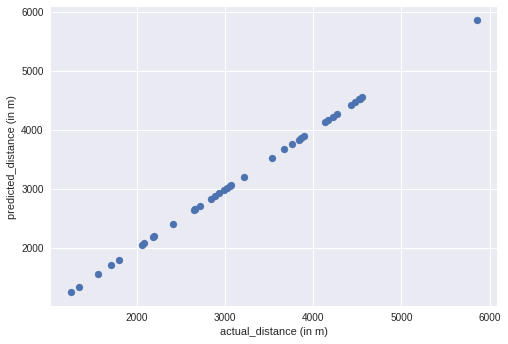

In [51]:
mean_distance = sonar_reg['Distance'].mean()
std_distance = sonar_reg['Distance'].std()
predicted_distance_real = (predicted_distance_std*std_distance)+(mean_distance)
plt.scatter(predicted_distance_real,sonar_reg['Distance'][61:99])                                                                        
plt.ylabel("predicted_distance (in m)")
plt.xlabel("actual_distance (in m)")
plt.show()

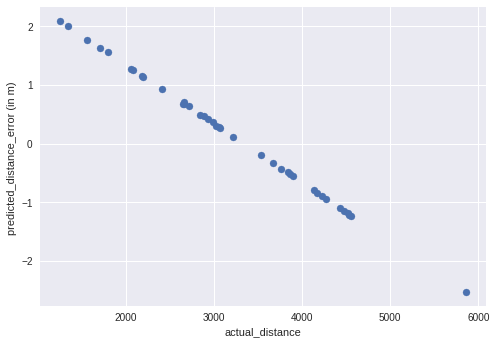

In [52]:
plt.scatter(np.array(sonar_reg['Distance'][61:99]),predicted_distance_real-np.array(sonar_reg['Distance'][61:99]))
plt.ylabel("predicted_distance_error (in m) ")
plt.xlabel("actual_distance")
plt.show()

## Mean Error check

In [53]:
mean_error = (predicted_distance - test_y).sum()/40
mean_error

0.14528265451514813

## Error Histogram to check assumption of normal distribution of errors

In [54]:
hist_pred = (predicted_distance-np.array(sonar_reg['Distance'][61:99]))
y = pd.DataFrame(hist_pred)

In [55]:
y.plot(kind = 'hist')

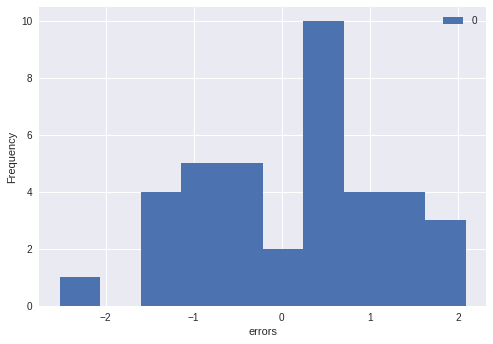

In [56]:
plt.xlabel("errors")
plt.show()

## Box Plot for errors

In [57]:
hist_pred = (predicted_distance-np.array(sonar_reg['Distance'][61:99]))
y = pd.DataFrame(hist_pred)

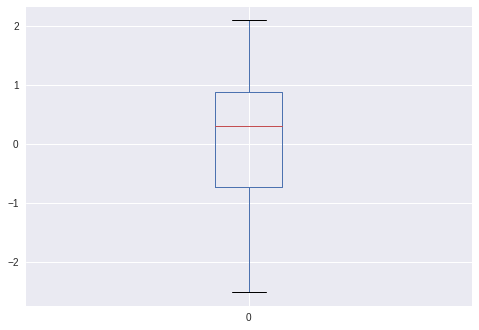

In [58]:
y.plot(kind = 'box')
plt.show()